In [12]:
reset -fs

In [13]:
import sklearn.feature_extraction.text as text
from sklearn import decomposition
import numpy as np
import pandas as pd

In [14]:
reviews_df = pd.read_csv("data/appstore_googleplay_all_reviews_clean_tomo.csv")

In [15]:
pos_reviews_df = reviews_df[reviews_df['rating'] > 3]
neu_reviews_df = reviews_df[reviews_df['rating'] == 3]
neg_reviews_df = reviews_df[reviews_df['rating'] < 3]

In [16]:
pos_reviews = list(pos_reviews_df['text_tokenized_lemmatized'].dropna())
neu_reviews = list(neu_reviews_df['text_tokenized_lemmatized'].dropna())
neg_reviews = list(neg_reviews_df['text_tokenized_lemmatized'].dropna())
print(f"# postiive reviews: {len(pos_reviews)}\n# neutral reviews: {len(neu_reviews_df)}\n# negative reviews: {len(neg_reviews_df)}")

# postiive reviews: 2374
# neutral reviews: 441
# negative reviews: 3294


(3,)


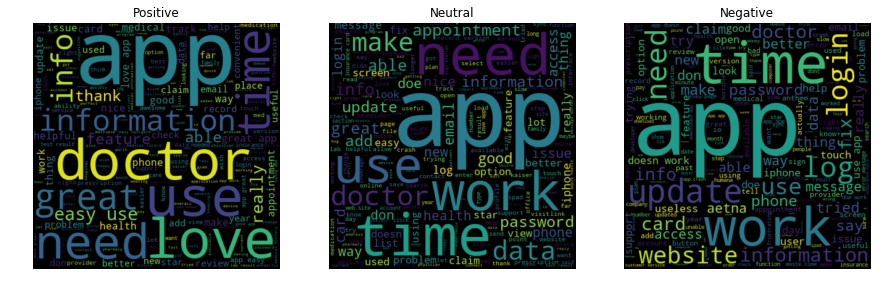

In [35]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

pos_reviews_flat = ' '.join(pos_reviews)
neu_reviews_flat = ' '.join(neu_reviews)
neg_reviews_flat = ' '.join(neg_reviews)
all_reviews = [pos_reviews_flat, neu_reviews_flat, neg_reviews_flat]
review_types = ['Positive', 'Neutral', 'Negative']

fig, ax = plt.subplots(nrows=1, ncols=len(all_reviews), figsize=(15, 10))
print(ax.shape)
for i, reviews in enumerate(all_reviews):
    cloud = WordCloud(height=400).generate(reviews)
    ax[i].imshow(cloud, interpolation='bilinear')
    ax[i].axis("off")
    ax[i].set_title(review_types[i])

In [17]:
def topic_model_nmf(reviews):
    # This step performs the vectorization,
    # tf-idf, stop word extraction, and normalization.
    # It assumes docs is a Python list,
    #with reviews as its elements.
    cv = text.TfidfVectorizer(reviews, stop_words='english')
    doc_term_matrix = cv.fit_transform(reviews)

    # The tokens can be extracted as:
    vocab = cv.get_feature_names()

    # Next we perform the NMF with 20 topics
    num_topics = 20

    #doctopic is the W matrix
    decomp = decomposition.NMF(n_components = num_topics,
             init = 'nndsvd')
    doctopic = decomp.fit_transform(doc_term_matrix) 

    # Now, we loop through each row of the T matrix
    # i.e. each topic,
    # and collect the top 25 words from each topic.
    n_top_words = 25
    topic_words = []
    for topic in decomp.components_:
        idx = np.argsort(topic)[::-1][0:n_top_words]
        topic_words.append([vocab[i] for i in idx])
        
    return

In [18]:
pos_reviews_topic_words = topic_model_nmf(pos_reviews)
neu_reviews_topic_words = topic_model_nmf(neu_reviews)
neg_reviews_topic_words = topic_model_nmf(neg_reviews)

pos_topic_words_df = pd.DataFrame(pos_reviews_topic_words).T;
neu_topic_words_df = pd.DataFrame(neu_reviews_topic_words).T;
neg_topic_words_df = pd.DataFrame(neg_reviews_topic_words).T;


In [21]:
pos_topic_words_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,great,use,love,app,good,helpful,awesome,like,doctor,work,information,user,useful,medical,nice,navigate,card,need,convenient,time
1,job,easy,having,best,far,answer,machine,really,appointment,fine,fingertip,friendly,extremely,record,able,easy,insurance,know,cigna,far
2,look,quick,fingertip,perfect,really,thanks,service,info,result,just,access,simple,simple,health,look,excellent,claim,info,fast,save
3,far,super,right,cigna,way,really,higi,new,able,perfectly,medical,job,application,track,version,fast,access,provides,make,using
4,way,simple,really,using,apps,extremely,company,website,prescription,problem,having,setup,far,info,job,simple,check,right,having,used


In [22]:
neu_topic_words_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,app,card,appointment,health,password,message,work,info,update,doctor,ipad,step,email,access,try,pharmacy,just,information,login,data
1,problem,wallet,make,apple,time,error,doesn,unnecessary,recent,search,iphone,day,time,version,crash,feature,pay,lot,screen,fitbit
2,time,apple,making,station,paste,send,touch,upload,need,add,optimized,enter,address,like,add,check,payment,doe,useful,phone
3,love,insurance,view,higi,use,open,doe,like,new,new,using,taken,good,better,emotional,prescription,far,coverage,right,use
4,fixed,add,don,integration,secure,link,upload,profile,latest,daughter,app,good,easy,recent,record,price,premium,reset,select,google


In [23]:
neg_topic_words_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,app,work,password,crash,log,time,update,login,open,card,error,useless,claim,screen,iphone,doctor,won,website,use,information
1,pay,doesn,paste,constantly,account,waste,latest,crashing,wont,insurance,message,completely,view,load,io,appointment,let,just,try,access
2,company,doe,manager,try,let,don,working,allow,fix,doe,try,pretty,doesnt,blank,data,search,sign,mobile,able,info
3,need,doesnt,user,opening,say,tried,crashing,able,doe,wallet,saying,provider,check,white,version,result,phone,fine,trying,medical
4,like,don,field,time,try,try,new,stop,point,view,later,literally,look,just,support,make,allow,sign,easy,record
